<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Coding-Sorting-Algorithms" data-toc-modified-id="Coding-Sorting-Algorithms-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Coding Sorting Algorithms</a></span></li></ul></div>

In [1]:
# Import libraries
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Coding Sorting Algorithms

The following sorting algorithms are coded below:

* Selection Sort
* Insertion Sort
* Merge Sort
* Quick Sort
* Counting Sort


In [2]:
# https://www.geeksforgeeks.org/selection-sort/
def selection_sort(alist):
    
    # first iteration selects each element one at a time
    for i in range(len(alist)):
        # set min_index value to i (starts at index 0)
        min_index = i 
        
        # second iteration through the list compares the element of the first iteration to every other element in the list 
        for j in range(i+1, len(alist)):
            # element value comparisons
            if alist[min_index] > alist[j]:
                # min_index becomes j index when j contains the smaller value 
                min_index = j
        
        # inner loop continues until all elements have been compared to the first loop's element and 
        # min_index now contains the lowest valued element 
        
        # the outer loop index and min-index elements are switched
        alist[i], alist[min_index] = alist[min_index], alist[i]
    # outer for loop moves on to next element

In [3]:
# https://www.geeksforgeeks.org/insertion-sort/ not my comments
def insertion_sort(alist): 
  
     # Traverse through 1 to len(arr) 
    for i in range(1, len(alist)): 
  
        key = alist[i] 
  
        # Move elements of arr[0..i-1], that are 
        # greater than key, to one position ahead 
        # of their current position 
        j = i-1
        while j >= 0 and key < alist[j] : 
            alist[j + 1] = alist[j] 
            j -= 1
        alist[j + 1] = key 



# https://runestone.academy/runestone/books/published/pythonds/SortSearch/TheInsertionSort.html?highlight=insertion
#def insertion_sort(alist):
 #   for index in range(1,len(alist)):
        
  #      currentvalue = alist[index]
   #     position = index

    #    while position > 0 and alist[position-1] > currentvalue:
      #      alist[position]=alist[position-1]
     #       position = position-1

       # alist[position]=currentvalue

In [4]:
# Adapted from https://runestone.academy/runestone/books/published/pythonds/SortSearch/TheMergeSort.html?highlight=merge%20sort
# and https://www.geeksforgeeks.org/merge-sort/

def merge_sort(alist):
    # Base case - if list is 1 or less, it is sorted by default
    if len(alist) > 1:

        # Get midpoint of the list with integer division
        midpoint = len(alist) // 2
    
        # Splitting the list in half using the midpoint
        left_list = alist[:midpoint]
        right_list = alist[midpoint:]

        # Recursively split the left_list and right_list until the base case is reached
        merge_sort(left_list)
        merge_sort(right_list)
        # At the end of the recursion, all lists will contain a maximum of 1 element and thus be sorted.

        # Code below merges the smaller sorted lists into larger sorted lists
        l = 0     # Index value for left_list
        r = 0     # Index value for right_list
        a = 0     # Index value for alist

        """Compare left and right lists, merging smaller sorted lists to become larger sorted lists, 
           eventually placing the sorted elements back into alist"""
        while l < len(left_list) and r < len(right_list):
            if left_list[l] <= right_list[r]: # keeps algorithm stable, maintaining order of alist 
                alist[a] = left_list[l]
                l += 1
            else:
                alist[a] = right_list[r]
                r += 1
            a += 1

        # Some lists will not have a left/right counterpart and so will be dealt with below       
        while l < len(left_list):
            alist[a] = left_list[l]
            l += 1
            a += 1

        while r < len(right_list):
            alist[a] = right_list[r]
            r += 1
            a += 1
        # The original list has now been sorted

In [5]:
# https://runestone.academy/runestone/books/published/pythonds/SortSearch/TheQuickSort.html?highlight=quicksort

"""def quick_sort(alist):
    quickSortHelper(alist,0,len(alist)-1)

def quickSortHelper(alist,first,last):
    if first<last:

        splitpoint = partition(alist,first,last)

        quickSortHelper(alist,first,splitpoint-1)
        quickSortHelper(alist,splitpoint+1,last)


def partition(alist,first,last):
    pivotvalue = alist[first]

    leftmark = first+1
    rightmark = last

    done = False
    while not done:

        while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
            leftmark = leftmark + 1

        while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
            rightmark = rightmark -1

        if rightmark < leftmark:
            done = True
        else:
            temp = alist[leftmark]
            alist[leftmark] = alist[rightmark]
            alist[rightmark] = temp

    temp = alist[first]
    alist[first] = alist[rightmark]
    alist[rightmark] = temp


    return rightmark"""

# https://stackabuse.com/sorting-algorithms-in-python/#quicksort

# There are different ways to do a Quick Sort partition, this implements the
# Hoare partition scheme. Tony Hoare also created the Quick Sort algorithm.
def partition(alist, low, high):
    # We select the middle element to be the pivot. Some implementations select
    # the first element or the last element. Sometimes the median value becomes
    # the pivot, or a random one. There are many more strategies that can be
    # chosen or created.
    pivot = nums[(low + high) // 2]
    i = low - 1
    j = high + 1
    while True:
        i += 1
        while nums[i] < pivot:
            i += 1

        j -= 1
        while nums[j] > pivot:
            j -= 1

        if i >= j:
            return j

        # If an element at i (on the left of the pivot) is larger than the
        # element at j (on right right of the pivot), then swap them
        nums[i], nums[j] = nums[j], nums[i]


def quick_sort(alist):
    # Create a helper function that will be called recursively
    def _quick_sort(items, low, high):
        if low < high:
            # This is the index after the pivot, where our lists are split
            split_index = partition(items, low, high)
            _quick_sort(items, low, split_index)
            _quick_sort(items, split_index + 1, high)

    _quick_sort(nums, 0, len(nums) - 1)

In [6]:
# https://www.w3resource.com/python-exercises/data-structures-and-algorithms/python-search-and-sorting-exercise-10.php
def counting_sort(alist, max_val=100):
    m = max_val + 1
    count = [0] * m                
    
    for a in alist:
    # count occurences
        count[a] += 1             
    i = 0
    for a in range(m):            
        for c in range(count[a]):  
            alist[i] = a
            i += 1
    return alist

In [7]:
# Creates an array of size n consisting of random integers between the values 0-100 inclusive
def random_array(n):

    array = []
    
    for i in range(0, n):
        array.append(random.randint(0, 100))
    
    return array

In [8]:
# Input sizes
n_size = [100, 250, 500, 750, 1000, 1250, 2500, 3750, 5000, 6250, 7500, 8750, 10000]

In [9]:
# Creates arrays for all input sizes
def all_arrays(n_size):
    
    arrays = []
    
    for n in n_size:
        arrays.append(random_array(n))
        
    return arrays
    

In [10]:
def benchmarking(sorting_func):
    
    # List to contain the running times for each algorithm
    sort_time = []

    # Time test for each sorting algorithm
    for array in all_arrays(n_size):
        start_time = time.time()
        sorting_func(array)
        end_time = time.time()
        time_elapsed = (end_time - start_time) * 1000
        sort_time.append(time_elapsed)
    
    return sort_time

In [11]:
def average_time(sort):
    
    times = []

    # Calculate benchmarking 10 times
    for i in range(0, 10):
        time = benchmarking(sort)
        times.append(time) 
    
    arr_times = np.array(times)
    
    average = np.mean(arr_times, axis=0)
    
    return average

In [12]:
all_algorithms = [selection_sort, insertion_sort, merge_sort, quick_sort, counting_sort]

all_averages = []

for a in all_algorithms:
    result = average_time(a)
    all_averages.append(result)

In [13]:
algorithms = ['Selection Sort', 'Insertion Sort', 'Merge Sort', 'Quick Sort', 'Counting Sort']

df = pd.DataFrame(all_averages, columns=n_size, index=algorithms)

In [14]:
df.round(3)

,100,250,500,750,1000,1250,2500,3750,5000,6250,7500,8750,10000
Selection Sort,0.499,1.895,8.182,16.849,30.416,46.376,188.792,459.576,780.625,1121.403,1658.914,2344.731,2919.600
Insertion Sort,0.499,1.898,8.671,19.346,32.419,51.956,224.302,537.760,943.500,1360.255,2063.108,3094.040,3845.320
Merge Sort,0.399,0.798,1.695,2.594,3.491,5.488,11.076,14.960,20.446,26.031,31.803,38.009,43.284
Quick Sort,0.299,0.200,0.894,1.102,1.891,2.186,5.595,10.166,15.363,21.744,30.218,39.392,47.976
Counting Sort,0.000,0.100,0.000,0.199,0.200,0.304,0.000,0.498,0.498,0.898,0.599,0.897,1.199


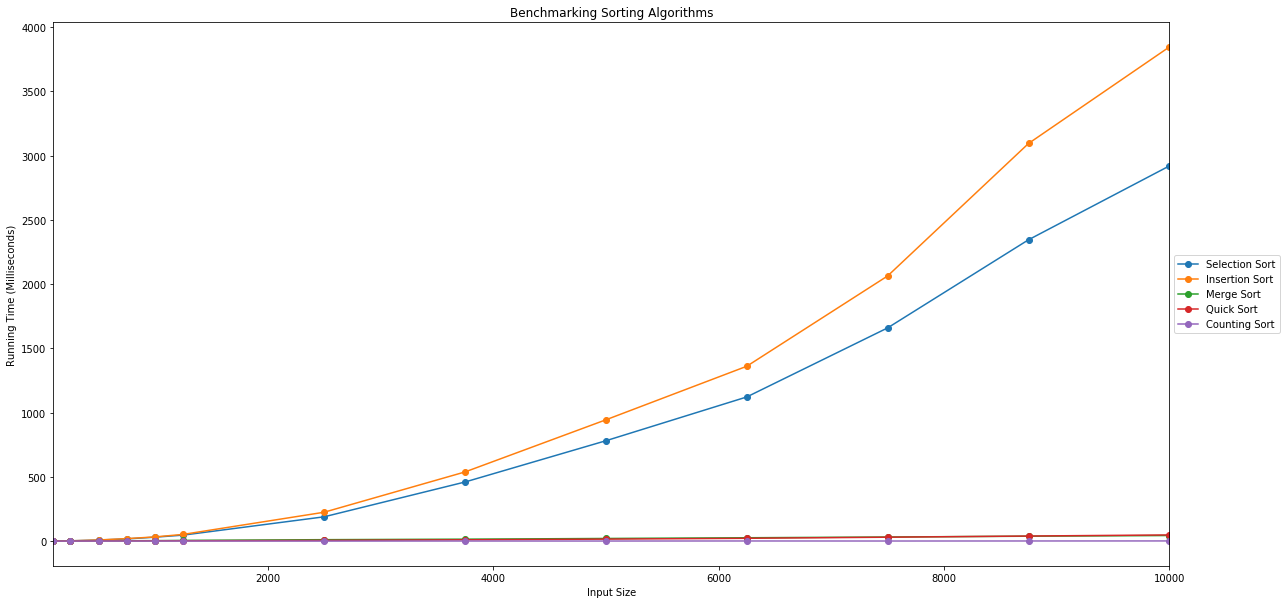

In [15]:
# https://stackoverflow.com/a/31734795
# https://stackoverflow.com/a/43610256
plot = df.iloc[:].T.plot(title="Benchmarking Sorting Algorithms", figsize=(20, 10), style='-o')
plot.set(xlabel="Input Size", ylabel="Running Time (Milliseconds)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.xticks(n_size)
plt.show()

The results for Merge, Quick and Counting sorts above are very close to one another along the entire length of the plot above, making it difficult to discern any differences between them. To get a clearer picture, the plot below shows only the results of these algorithm implementations. 

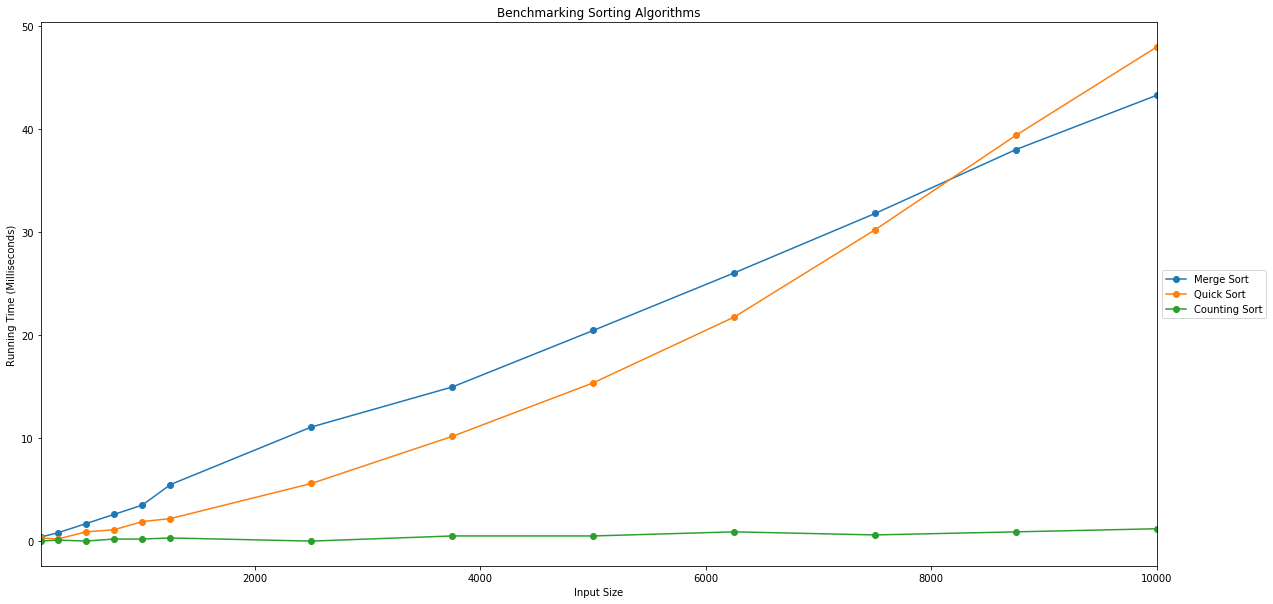

In [16]:
plot = df.iloc[2:5].T.plot(title="Benchmarking Sorting Algorithms", figsize=(20, 10), style='-o')
plot.set(xlabel="Input Size", ylabel="Running Time (Milliseconds)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.xticks(n_size)
plt.show()

In [17]:
# Tim sort averages

tim_result = average_time(sorted)

all_averages.append(tim_result)

[array([4.99057770e-01, 1.89461708e+00, 8.18219185e+00, 1.68485403e+01,
       3.04162979e+01, 4.63764191e+01, 1.88792396e+02, 4.59576440e+02,
       7.80624771e+02, 1.12140322e+03, 1.65891411e+03, 2.34473095e+03,
       2.91959991e+03]), array([4.99200821e-01, 1.89802647e+00, 8.67078304e+00, 1.93458319e+01,
       3.24187994e+01, 5.19556284e+01, 2.24301648e+02, 5.37760305e+02,
       9.43500018e+02, 1.36025529e+03, 2.06310823e+03, 3.09404020e+03,
       3.84531956e+03]), array([ 0.39856434,  0.79798698,  1.69458389,  2.59363651,  3.49097252,
        5.48768044, 11.07616425, 14.96036053, 20.44584751, 26.03144646,
       31.80294037, 38.00916672, 43.28401089]), array([ 0.29947758,  0.19979477,  0.89430809,  1.10223293,  1.89094543,
        2.18594074,  5.59453964, 10.16559601, 15.36252499, 21.74403667,
       30.21757603, 39.39247131, 47.97565937]), array([0.        , 0.09973049, 0.        , 0.19948483, 0.19955635,
       0.30400753, 0.        , 0.49824715, 0.49760342, 0.898242  ,
     

In [25]:

algorithms = ['Insertion Sort', 'Selection Sort', 'Merge Sort', 'Quick Sort', 'Counting Sort', 'Tim Sort']

df2 = pd.DataFrame(all_averages, columns=n_size, index=algorithms)
df2.round(3)

,100,250,500,750,1000,1250,2500,3750,5000,6250,7500,8750,10000
Insertion Sort,0.499,1.895,8.182,16.849,30.416,46.376,188.792,459.576,780.625,1121.403,1658.914,2344.731,2919.600
Selection Sort,0.499,1.898,8.671,19.346,32.419,51.956,224.302,537.760,943.500,1360.255,2063.108,3094.040,3845.320
Merge Sort,0.399,0.798,1.695,2.594,3.491,5.488,11.076,14.960,20.446,26.031,31.803,38.009,43.284
Quick Sort,0.299,0.200,0.894,1.102,1.891,2.186,5.595,10.166,15.363,21.744,30.218,39.392,47.976
Counting Sort,0.000,0.100,0.000,0.199,0.200,0.304,0.000,0.498,0.498,0.898,0.599,0.897,1.199
Tim Sort,0.000,0.000,0.000,0.100,0.100,0.000,0.299,0.398,0.299,0.499,0.798,0.698,0.896


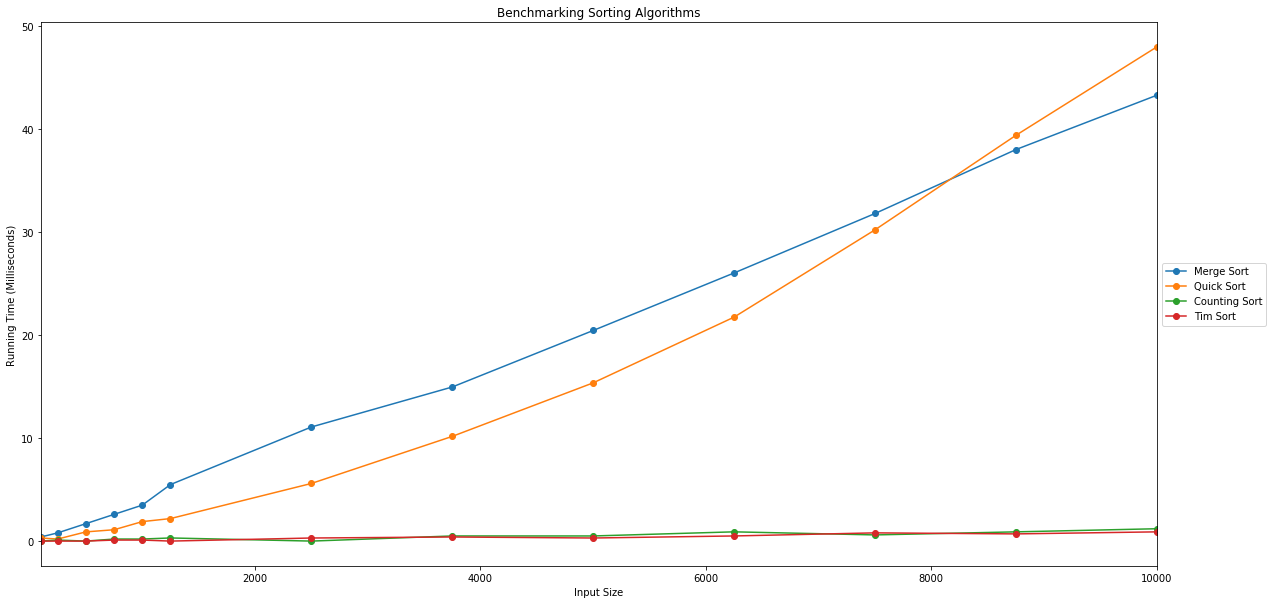

In [27]:
# Left out Insertion and Selection as can't see the differences between the others
plot = df2.iloc[2:6].T.plot(title="Benchmarking Sorting Algorithms", figsize=(20, 10), style='-o')
plot.set(xlabel="Input Size", ylabel="Running Time (Milliseconds)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.xticks(n_size)
plt.show()

In [55]:
n_size = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

all_algorithms = [insertion_sort, selection_sort, merge_sort, quick_sort, counting_sort]

all_averages = []

for a in all_algorithms:
    result = average_time(a)
    all_averages.append(result)

In [56]:
algorithms = ['Insertion Sort', 'Selection Sort', 'Merge Sort', 'Quick Sort', 'Counting Sort']

df3 = pd.DataFrame(all_averages, columns=n_size, index=algorithms)

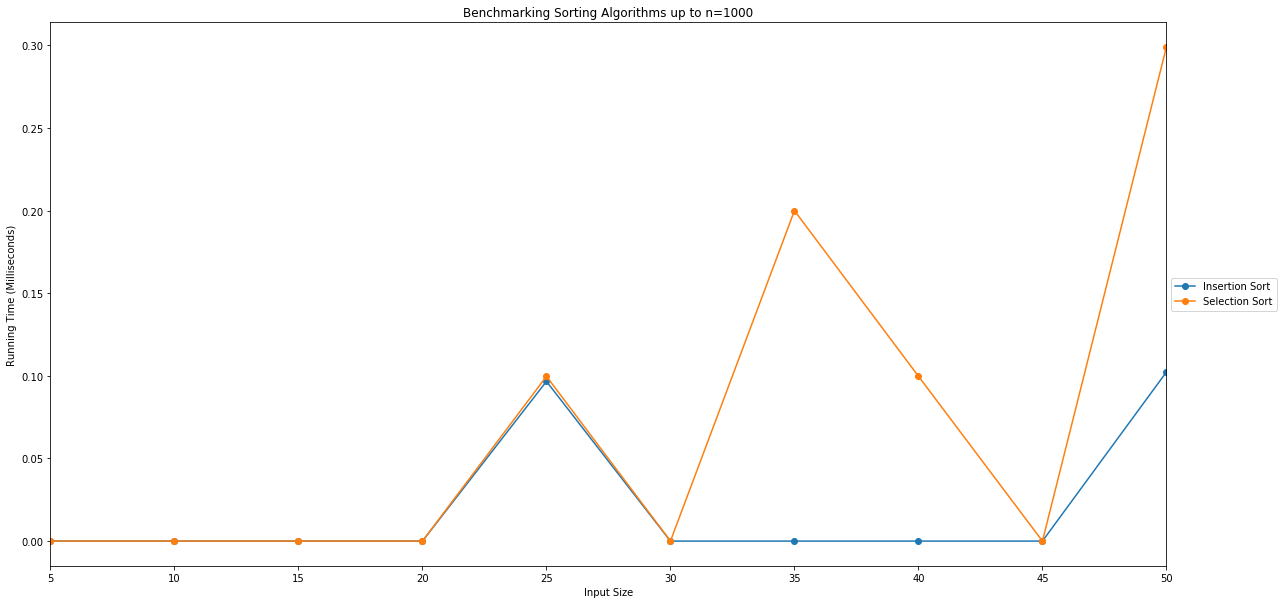

In [57]:
plot = df3.iloc[:2].T.plot(title="Benchmarking Sorting Algorithms up to n=1000", figsize=(20, 10), style='-o')
plot.set(xlabel="Input Size", ylabel="Running Time (Milliseconds)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.xticks(n_size)
plt.show()